# Linear Regression

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('../data/weight-height.csv')

In [3]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


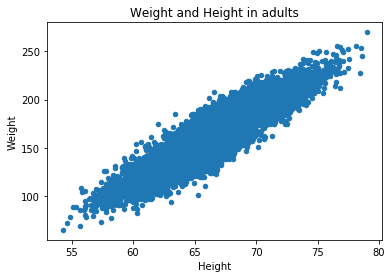

In [4]:
df.plot(kind='scatter',
        x='Height',
        y='Weight',
        title='Weight and Height in adults')

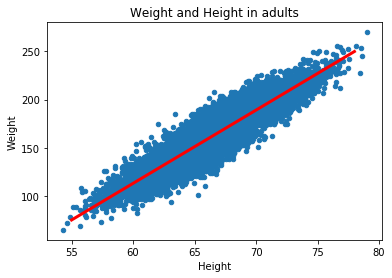

In [5]:
df.plot(kind='scatter',
        x='Height',
        y='Weight',
        title='Weight and Height in adults')

# Here we're plotting the red line 'by hand' with fixed values
# We'll try to learn this line with an algorithm below
plt.plot([55, 78], [75, 250], color='red', linewidth=3)

In [6]:
def line(x, w=0, b=0):
    return x * w + b

In [7]:
x = np.linspace(55, 80, 100)

In [8]:
x

array([55.        , 55.25252525, 55.50505051, 55.75757576, 56.01010101,
       56.26262626, 56.51515152, 56.76767677, 57.02020202, 57.27272727,
       57.52525253, 57.77777778, 58.03030303, 58.28282828, 58.53535354,
       58.78787879, 59.04040404, 59.29292929, 59.54545455, 59.7979798 ,
       60.05050505, 60.3030303 , 60.55555556, 60.80808081, 61.06060606,
       61.31313131, 61.56565657, 61.81818182, 62.07070707, 62.32323232,
       62.57575758, 62.82828283, 63.08080808, 63.33333333, 63.58585859,
       63.83838384, 64.09090909, 64.34343434, 64.5959596 , 64.84848485,
       65.1010101 , 65.35353535, 65.60606061, 65.85858586, 66.11111111,
       66.36363636, 66.61616162, 66.86868687, 67.12121212, 67.37373737,
       67.62626263, 67.87878788, 68.13131313, 68.38383838, 68.63636364,
       68.88888889, 69.14141414, 69.39393939, 69.64646465, 69.8989899 ,
       70.15151515, 70.4040404 , 70.65656566, 70.90909091, 71.16161616,
       71.41414141, 71.66666667, 71.91919192, 72.17171717, 72.42

In [9]:
yhat = line(x, w=7, b=-300) # figured out by trail and error

In [10]:
yhat

array([ 85.        ,  86.76767677,  88.53535354,  90.3030303 ,
        92.07070707,  93.83838384,  95.60606061,  97.37373737,
        99.14141414, 100.90909091, 102.67676768, 104.44444444,
       106.21212121, 107.97979798, 109.74747475, 111.51515152,
       113.28282828, 115.05050505, 116.81818182, 118.58585859,
       120.35353535, 122.12121212, 123.88888889, 125.65656566,
       127.42424242, 129.19191919, 130.95959596, 132.72727273,
       134.49494949, 136.26262626, 138.03030303, 139.7979798 ,
       141.56565657, 143.33333333, 145.1010101 , 146.86868687,
       148.63636364, 150.4040404 , 152.17171717, 153.93939394,
       155.70707071, 157.47474747, 159.24242424, 161.01010101,
       162.77777778, 164.54545455, 166.31313131, 168.08080808,
       169.84848485, 171.61616162, 173.38383838, 175.15151515,
       176.91919192, 178.68686869, 180.45454545, 182.22222222,
       183.98989899, 185.75757576, 187.52525253, 189.29292929,
       191.06060606, 192.82828283, 194.5959596 , 196.36

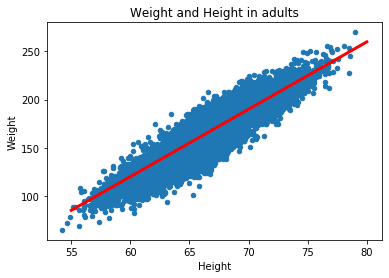

In [11]:
df.plot(kind='scatter',
        x='Height',
        y='Weight',
        title='Weight and Height in adults')
plt.plot(x, yhat, color='red', linewidth=3)

### Cost Function

In [12]:
def mean_squared_error(y_true, y_pred):
    s = (y_true - y_pred)**2
    return s.mean()

In [13]:
X = df[['Height']].values
y_true = df['Weight'].values

In [14]:
y_true

array([241.89356318, 162.31047252, 212.74085556, ..., 128.47531878,
       163.85246135, 113.64910268])

In [15]:
y_pred = line(X)

In [16]:
y_pred

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]])

In [17]:
mean_squared_error(y_true, y_pred.ravel())

27093.83757456157

### you do it!

Try changing the values of the parameters b and w in the line above and plot it again to see how the plot and the cost  change.

Text(0.5, 0, 'b')

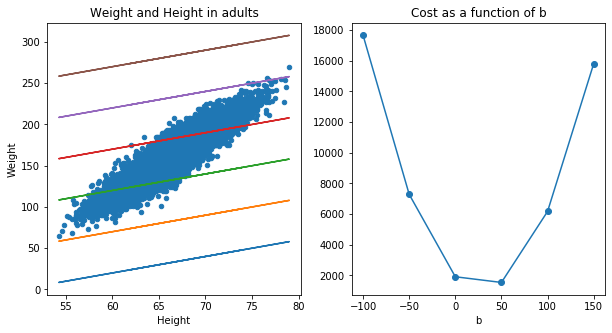

In [18]:
plt.figure(figsize=(10, 5))

# we are going to draw 2 plots in the same figure
# first plot, data and a few lines
ax1 = plt.subplot(121)
df.plot(kind='scatter',
        x='Height',
        y='Weight',
        title='Weight and Height in adults', ax=ax1)

# let's explore the cost function for a few values of b between -100 and +150
bbs = np.array([-100, -50, 0, 50, 100, 150])
mses = []  # we will append the values of the cost here, for each line
for b in bbs:
    y_pred = line(X, w=2, b=b)
    mse = mean_squared_error(y_true, y_pred)
    mses.append(mse)
    plt.plot(X, y_pred)

# second plot: Cost function
ax2 = plt.subplot(122)
plt.plot(bbs, mses, 'o-')
plt.title('Cost as a function of b')
plt.xlabel('b')

## Linear Regression with Keras

In [19]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam, SGD

Using TensorFlow backend.


In [20]:
model = Sequential()

In [21]:
model.add(Dense(1, input_shape=(1,)))

Instructions for updating:
Colocations handled automatically by placer.


In [22]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [23]:
model.compile(Adam(lr=0.8), 'mean_squared_error')

In [24]:
model.fit(X, y_true, epochs=40)

Instructions for updating:
Use tf.cast instead.
Epoch 1/40
10000/10000 [==============================] - 1s 76us/step - loss: 888.0073
Epoch 2/40
10000/10000 [==============================] - 0s 36us/step - loss: 551.8890
Epoch 3/40
10000/10000 [==============================] - 0s 31us/step - loss: 535.5106
Epoch 4/40
10000/10000 [==============================] - 0s 30us/step - loss: 471.4980
Epoch 5/40
10000/10000 [==============================] - 0s 31us/step - loss: 418.8497
Epoch 6/40
10000/10000 [==============================] - 0s 31us/step - loss: 399.0221
Epoch 7/40
10000/10000 [==============================] - 0s 31us/step - loss: 349.6544
Epoch 8/40
10000/10000 [==============================] - 0s 32us/step - loss: 302.1035
Epoch 9/40
10000/10000 [==============================] - 0s 32us/step - loss: 296.6665
Epoch 10/40
10000/10000 [==============================] - 0s 30us/step - loss: 262.8544
Epoch 11/40
10000/10000 [==============================] - 0s 28us/step

In [25]:
y_pred = model.predict(X)

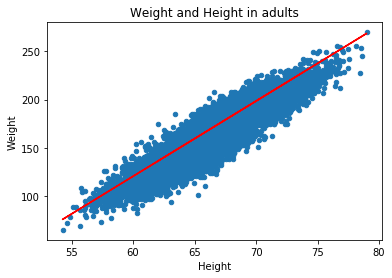

In [26]:
df.plot(kind='scatter',
        x='Height',
        y='Weight',
        title='Weight and Height in adults')
plt.plot(X, y_pred, color='red')

In [27]:
W, B = model.get_weights()

In [28]:
W

array([[7.8137183]], dtype=float32)

In [29]:
B

array([-348.4288], dtype=float32)

## Evaluating Model Performance

In [30]:
from sklearn.metrics import r2_score

In [31]:
print("The R2 score is {:0.3f}".format(r2_score(y_true, y_pred)))

The R2 score is 0.781


### Train Test Split

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y_true,
                                                    test_size=0.2)

In [34]:
len(X_train)

8000

In [35]:
len(X_test)

2000

In [36]:
W[0, 0] = 0.0
B[0] = 0.0
model.set_weights((W, B))

In [37]:
model.fit(X_train, y_train, epochs=50, verbose=0)

In [38]:
y_train_pred = model.predict(X_train).ravel()
y_test_pred = model.predict(X_test).ravel()

In [39]:
from sklearn.metrics import mean_squared_error as mse

In [40]:
print("The Mean Squared Error on the Train set is:\t{:0.1f}".format(mse(y_train, y_train_pred)))
print("The Mean Squared Error on the Test set is:\t{:0.1f}".format(mse(y_test, y_test_pred)))

The Mean Squared Error on the Train set is:	152.4
The Mean Squared Error on the Test set is:	144.1


In [41]:
print("The R2 score on the Train set is:\t{:0.3f}".format(r2_score(y_train, y_train_pred)))
print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(y_test, y_test_pred)))

The R2 score on the Train set is:	0.853
The R2 score on the Test set is:	0.857


# Classification

In [42]:
df = pd.read_csv('../data/user_visit_duration.csv')

In [43]:
df.head()

,Time (min),Buy
0,2.000000,0
1,0.683333,0
2,3.216667,1
3,0.900000,0
4,1.533333,1


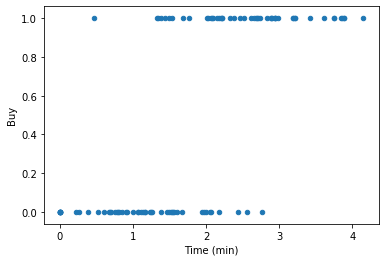

In [44]:
df.plot(kind='scatter', x='Time (min)', y='Buy')

In [45]:
model = Sequential()
model.add(Dense(1, input_shape=(1,), activation='sigmoid'))

In [46]:
model.compile(SGD(lr=0.5), 'binary_crossentropy', metrics=['accuracy'])

In [47]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [48]:
X = df[['Time (min)']].values
y = df['Buy'].values

model.fit(X, y, epochs=25)

Epoch 1/25
100/100 [==============================] - 0s 5ms/step - loss: 0.9521 - acc: 0.4600
Epoch 2/25
100/100 [==============================] - 0s 85us/step - loss: 0.6751 - acc: 0.5300
Epoch 3/25
100/100 [==============================] - 0s 98us/step - loss: 0.6321 - acc: 0.5600
Epoch 4/25
100/100 [==============================] - 0s 88us/step - loss: 0.5790 - acc: 0.6600
Epoch 5/25
100/100 [==============================] - 0s 161us/step - loss: 0.5441 - acc: 0.7200
Epoch 6/25
100/100 [==============================] - 0s 129us/step - loss: 0.5297 - acc: 0.7400
Epoch 7/25
100/100 [==============================] - 0s 123us/step - loss: 0.5048 - acc: 0.7800
Epoch 8/25
100/100 [==============================] - 0s 98us/step - loss: 0.4857 - acc: 0.8400
Epoch 9/25
100/100 [==============================] - 0s 136us/step - loss: 0.4824 - acc: 0.7800
Epoch 10/25
100/100 [==============================] - 0s 141us/step - loss: 0.4676 - acc: 0.7900
Epoch 11/25
100/100 [==============

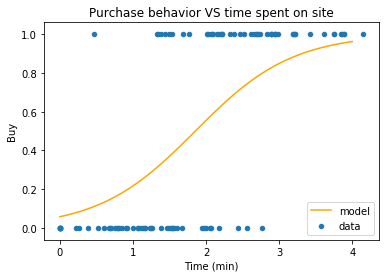

In [49]:
ax = df.plot(kind='scatter', x='Time (min)', y='Buy',
             title='Purchase behavior VS time spent on site')

temp = np.linspace(0, 4)
ax.plot(temp, model.predict(temp), color='orange')
plt.legend(['model', 'data'])

In [50]:
temp_class = model.predict(temp) > 0.5

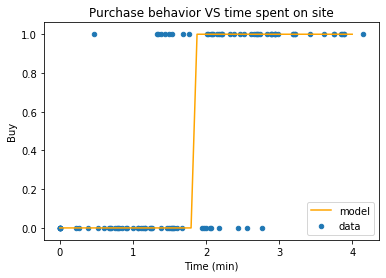

In [51]:
ax = df.plot(kind='scatter', x='Time (min)', y='Buy',
             title='Purchase behavior VS time spent on site')

temp = np.linspace(0, 4)
ax.plot(temp, temp_class, color='orange')
plt.legend(['model', 'data'])

In [52]:
y_pred = model.predict(X)
y_class_pred = y_pred > 0.5

In [53]:
from sklearn.metrics import accuracy_score

In [54]:
print("The accuracy score is {:0.3f}".format(accuracy_score(y, y_class_pred)))

The accuracy score is 0.820


### Train/Test split


In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [56]:
params = model.get_weights()
params = [np.zeros(w.shape) for w in params]
model.set_weights(params)

In [57]:
print("The accuracy score is {:0.3f}".format(accuracy_score(y, model.predict(X) > 0.5)))

The accuracy score is 0.500


In [58]:
model.fit(X_train, y_train, epochs=25, verbose=0)

In [59]:
print("The train accuracy score is {:0.3f}".format(accuracy_score(y_train, model.predict(X_train) > 0.5)))
print("The test accuracy score is {:0.3f}".format(accuracy_score(y_test, model.predict(X_test) > 0.5)))

The train accuracy score is 0.838
The test accuracy score is 0.800


## Cross Validation

In [60]:
from keras.wrappers.scikit_learn import KerasClassifier

In [61]:
def build_logistic_regression_model():
    model = Sequential()
    model.add(Dense(1, input_shape=(1,), activation='sigmoid'))
    model.compile(SGD(lr=0.5),
                  'binary_crossentropy',
                  metrics=['accuracy'])
    return model

In [62]:
model = KerasClassifier(build_fn=build_logistic_regression_model,
                        epochs=25,
                        verbose=0)

In [63]:
from sklearn.model_selection import cross_val_score, KFold

In [64]:
cv = KFold(3, shuffle=True)

In [65]:
scores = cross_val_score(model, X, y, cv=cv)

In [66]:
scores

array([0.79411765, 0.72727273, 0.96969697])

In [67]:
print("The cross validation accuracy is {:0.4f} ± {:0.4f}".format(scores.mean(), scores.std()))

The cross validation accuracy is 0.8304 ± 0.1022


## Confusion Matrix

In [68]:
from sklearn.metrics import confusion_matrix

In [69]:
confusion_matrix(y, y_class_pred)

array([[41,  9],
       [ 9, 41]])

In [70]:
def pretty_confusion_matrix(y_true, y_pred, labels=["False", "True"]):
    cm = confusion_matrix(y_true, y_pred)
    pred_labels = ['Predicted '+ l for l in labels]
    df = pd.DataFrame(cm, index=labels, columns=pred_labels)
    return df

In [71]:
pretty_confusion_matrix(y, y_class_pred, ['Not Buy', 'Buy'])

,Predicted Not Buy,Predicted Buy
Not Buy,41,9
Buy,9,41


In [72]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [73]:
print("Precision:\t{:0.3f}".format(precision_score(y, y_class_pred)))
print("Recall:  \t{:0.3f}".format(recall_score(y, y_class_pred)))
print("F1 Score:\t{:0.3f}".format(f1_score(y, y_class_pred)))

Precision:	0.820
Recall:  	0.820
F1 Score:	0.820


In [74]:
from sklearn.metrics import classification_report

In [75]:
print(classification_report(y, y_class_pred))

              precision    recall  f1-score   support

           0       0.82      0.82      0.82        50
           1       0.82      0.82      0.82        50

    accuracy                           0.82       100
   macro avg       0.82      0.82      0.82       100
weighted avg       0.82      0.82      0.82       100



## Feature Preprocessing

### Categorical Features

In [76]:
df = pd.read_csv('../data/weight-height.csv')
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [77]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [78]:
pd.get_dummies(df['Gender'], prefix='Gender').head()

,Gender_Female,Gender_Male
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


## Feature Transformations

#### 1) Rescale with fixed factor

In [79]:
df['Height (feet)'] = df['Height']/12.0
df['Weight (100 lbs)'] = df['Weight']/100.0

In [80]:
df.describe().round(2)

,Height,Weight,Height (feet),Weight (100 lbs)
count,10000.00,10000.00,10000.00,10000.00
mean,66.37,161.44,5.53,1.61
std,3.85,32.11,0.32,0.32
min,54.26,64.70,4.52,0.65
25%,63.51,135.82,5.29,1.36
50%,66.32,161.21,5.53,1.61
75%,69.17,187.17,5.76,1.87
max,79.00,269.99,6.58,2.70


#### MinMax normalization

In [81]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()
df['Weight_mms'] = mms.fit_transform(df[['Weight']])
df['Height_mms'] = mms.fit_transform(df[['Height']])
df.describe().round(2)

,Height,Weight,Height (feet),Weight (100 lbs),Weight_mms,Height_mms
count,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00
mean,66.37,161.44,5.53,1.61,0.47,0.49
std,3.85,32.11,0.32,0.32,0.16,0.16
min,54.26,64.70,4.52,0.65,0.00,0.00
25%,63.51,135.82,5.29,1.36,0.35,0.37
50%,66.32,161.21,5.53,1.61,0.47,0.49
75%,69.17,187.17,5.76,1.87,0.60,0.60
max,79.00,269.99,6.58,2.70,1.00,1.00


#### 3) Standard normalization

In [82]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
df['Weight_ss'] = ss.fit_transform(df[['Weight']])
df['Height_ss'] = ss.fit_transform(df[['Height']])
df.describe().round(2)

,Height,Weight,Height (feet),Weight (100 lbs),Weight_mms,Height_mms,Weight_ss,Height_ss
count,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00
mean,66.37,161.44,5.53,1.61,0.47,0.49,0.00,0.00
std,3.85,32.11,0.32,0.32,0.16,0.16,1.00,1.00
min,54.26,64.70,4.52,0.65,0.00,0.00,-3.01,-3.15
25%,63.51,135.82,5.29,1.36,0.35,0.37,-0.80,-0.74
50%,66.32,161.21,5.53,1.61,0.47,0.49,-0.01,-0.01
75%,69.17,187.17,5.76,1.87,0.60,0.60,0.80,0.73
max,79.00,269.99,6.58,2.70,1.00,1.00,3.38,3.28


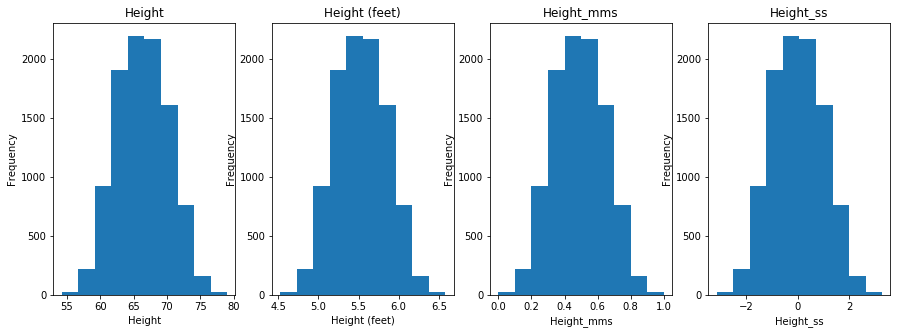

In [83]:
plt.figure(figsize=(15, 5))

for i, feature in enumerate(['Height', 'Height (feet)', 'Height_mms', 'Height_ss']):
    plt.subplot(1, 4, i+1)
    df[feature].plot(kind='hist', title=feature)
    plt.xlabel(feature)

# Machine Learning Exercises

## Exercise 1

You've just been hired at a real estate investment firm and they would like you to build a model for pricing houses. You are given a dataset that contains data for house prices and a few features like number of bedrooms, size in square feet and age of the house. Let's see if you can build a model that is able to predict the price. In this exercise we extend what we have learned about linear regression to a dataset with more than one feature. Here are the steps to complete it:

1. Load the dataset ../data/housing-data.csv
- plot the histograms for each feature
- create 2 variables called X and y: X shall be a matrix with 3 columns (sqft,bdrms,age) and y shall be a vector with 1 column (price)
- create a linear regression model in Keras with the appropriate number of inputs and output
- split the data into train and test with a 20% test size
- train the model on the training set and check its accuracy on training and test set
- how's your model doing? Is the loss growing smaller?
- try to improve your model with these experiments:
    - normalize the input features with one of the rescaling techniques mentioned above
    - use a different value for the learning rate of your model
    - use a different optimizer
- once you're satisfied with training, check the R2score on the test set

In [84]:
# 1. Load the dataset ../data/housing-data.csv
df = pd.read_csv('../data/housing-data.csv')
df.head()

,sqft,bdrms,age,price
0,2104,3,70,399900
1,1600,3,28,329900
2,2400,3,44,369000
3,1416,2,49,232000
4,3000,4,75,539900


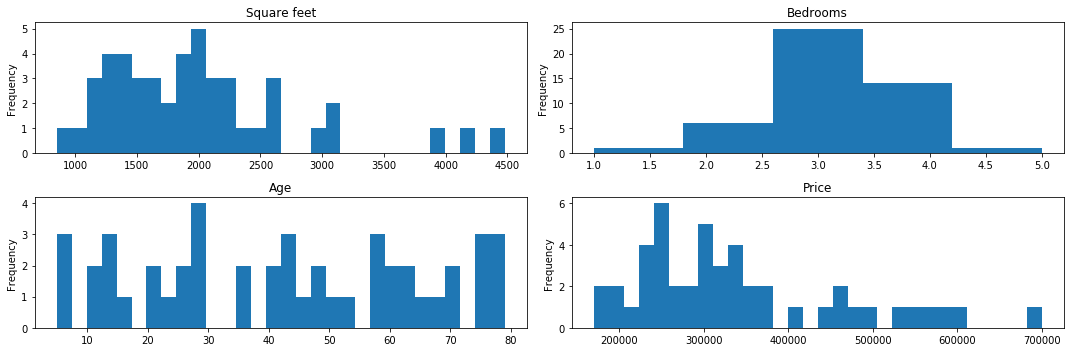

In [85]:
# 2. plot the histograms for each feature

fig, ax = plt.subplots(2, 2, figsize=(15, 5))

df['sqft'].plot(ax=ax[0][0],
        kind='hist',
        bins=30,
        title='Square feet')

df['bdrms'].plot(ax=ax[0][1],
        kind='hist',
        bins=5,
        title='Bedrooms')

df['age'].plot(ax=ax[1][0],
        kind='hist',
        bins=30,
        title='Age')

df['price'].plot(ax=ax[1][1],
        kind='hist',
        bins=30,
        title='Price')

plt.tight_layout()

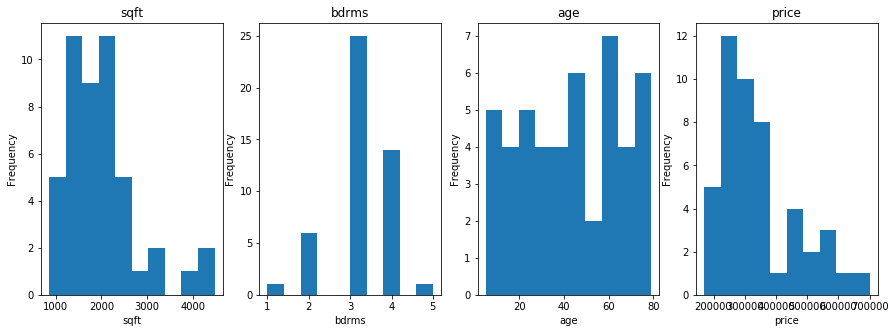

In [86]:
# other approach

plt.figure(figsize=(15,5))
for i, feature in enumerate(df.columns):
    plt.subplot(1, 4, i+1)
    df[feature].plot(kind='hist', title=feature)
    plt.xlabel(feature)

In [87]:
# 3. create 2 variables called X and y: X shall be a matrix with 3 columns (sqft,bdrms,age) and y shall be a vector with 1 column (price)

X = df[['sqft','bdrms','age']].values
y = df['price'].values
X.shape

(47, 3)

In [88]:
# 4. create a linear regression model in Keras with the appropriate number of inputs and output

model = Sequential()
model.add(Dense(1, input_shape=(3,)))
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 1)                 4         
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


In [89]:
# 5. split the data into train and test with a 20% test size

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    test_size=0.2)

In [90]:
# 6. train the model on the training set and check its accuracy on training and test set

model.compile(Adam(lr=0.8), 'mean_squared_error')
model.fit(X_train, y_train, epochs=50)

Epoch 1/50
37/37 [==============================] - 1s 14ms/step - loss: 127505332279.3513
Epoch 2/50
37/37 [==============================] - 0s 117us/step - loss: 125197728906.3784
Epoch 3/50
37/37 [==============================] - 0s 117us/step - loss: 122851815534.7027
Epoch 4/50
37/37 [==============================] - 0s 112us/step - loss: 120554703014.0541
Epoch 5/50
37/37 [==============================] - 0s 156us/step - loss: 118235413199.5676
Epoch 6/50
37/37 [==============================] - 0s 124us/step - loss: 116073573625.0811
Epoch 7/50
37/37 [==============================] - 0s 129us/step - loss: 113877003734.4865
Epoch 8/50
37/37 [==============================] - 0s 173us/step - loss: 111751508632.2162
Epoch 9/50
37/37 [==============================] - 0s 141us/step - loss: 109609451962.8108
Epoch 10/50
37/37 [==============================] - 0s 183us/step - loss: 107558649856.0000
Epoch 11/50
37/37 [==============================] - 0s 134us/step - loss: 10550

In [91]:
# 7. how's your model doing? Is the loss growing smaller?

# loss is getting smaller but really high overall

In [92]:
# 8. try to improve your model with these experiments:

 #   normalize the input features with one of the rescaling techniques mentioned above
 #   use a different value for the learning rate of your model
 #   use a different optimizer
    
# feature scaling
ss = StandardScaler()

X_scaled = np.zeros_like(X)
y_scaled = np.zeros(y.shape)

X_scaled = ss.fit_transform(X)
y_scaled = ss.fit_transform(y.reshape(-1, 1))

X_train, X_test, y_train, y_test = train_test_split(X_scaled, 
                                                    y_scaled.reshape(y.shape),
                                                    test_size=0.2)

model.compile(Adam(lr=0.8), 'mean_squared_error')
model.fit(X_train, y_train, epochs=50)

Epoch 1/50
37/37 [==============================] - 0s 14ms/step - loss: 32404.6725
Epoch 2/50
37/37 [==============================] - 0s 128us/step - loss: 31056.8890
Epoch 3/50
37/37 [==============================] - 0s 128us/step - loss: 29694.8554
Epoch 4/50
37/37 [==============================] - 0s 186us/step - loss: 28409.8935
Epoch 5/50
37/37 [==============================] - 0s 122us/step - loss: 27191.5674
Epoch 6/50
37/37 [==============================] - 0s 134us/step - loss: 25977.9645
Epoch 7/50
37/37 [==============================] - 0s 203us/step - loss: 24712.3260
Epoch 8/50
37/37 [==============================] - 0s 148us/step - loss: 23731.0903
Epoch 9/50
37/37 [==============================] - 0s 212us/step - loss: 22561.6266
Epoch 10/50
37/37 [==============================] - 0s 161us/step - loss: 21578.4387
Epoch 11/50
37/37 [==============================] - 0s 225us/step - loss: 20530.5067
Epoch 12/50
37/37 [==============================] - 0s 169us/st

In [93]:
# different learning rate

model = Sequential()
model.add(Dense(1, input_shape=(3,)))
model.summary()
model.compile(Adam(lr=0.05), 'mean_squared_error')
model.fit(X_train, y_train, epochs=50)

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 1)                 4         
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
37/37 [==============================] - 1s 15ms/step - loss: 4.1173
Epoch 2/50
37/37 [==============================] - 0s 115us/step - loss: 3.3455
Epoch 3/50
37/37 [==============================] - 0s 126us/step - loss: 2.7166
Epoch 4/50
37/37 [==============================] - 0s 141us/step - loss: 2.1892
Epoch 5/50
37/37 [==============================] - 0s 200us/step - loss: 1.7228
Epoch 6/50
37/37 [==============================] - 0s 140us/step - loss: 1.3646
Epoch 7/50
37/37 [==============================] - 0s 193us/step - loss: 1.0771
Epoch 8/50
37/37 [==============================] - 0s 144us/step - loss: 0.8774
Epoch 9

In [94]:
# 9. once you're satisfied with training, check the R2score on the test set

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print("The R2 score on the Train set is:\t{:0.3f}".format(r2_score(y_train, y_train_pred)))
print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(y_test, y_test_pred)))

The R2 score on the Train set is:	0.730
The R2 score on the Test set is:	0.679


## Exercise 2

Your boss was extremely happy with your work on the housing price prediction model and decided to entrust you with a more challenging task. They've seen a lot of people leave the company recently and they would like to understand why that's happening. They have collected historical data on employees and they would like you to build a model that is able to predict which employee will leave next. They would like a model that is better than random guessing. They also prefer false negatives than false positives, in this first phase. Fields in the dataset include:

- Employee satisfaction level
- Last evaluation
- Number of projects
- Average monthly hours
- Time spent at the company
- Whether they have had a work accident
- Whether they have had a promotion in the last 5 years
- Department
- Salary
- Whether the employee has left

Your goal is to predict the binary outcome variable `left` using the rest of the data. Since the outcome is binary, this is a classification problem. Here are some things you may want to try out:

1. load the dataset at ../data/HR_comma_sep.csv, inspect it with `.head()`, `.info()` and `.describe()`.
- Establish a benchmark: what would be your accuracy score if you predicted everyone stay?
- Check if any feature needs rescaling. You may plot a histogram of the feature to decide which rescaling method is more appropriate.
- convert the categorical features into binary dummy columns. You will then have to combine them with the numerical features using `pd.concat`.
- do the usual train/test split with a 20% test size
- play around with learning rate and optimizer
- check the confusion matrix, precision and recall
- check if you still get the same results if you use a 5-Fold cross validation on all the data
- Is the model good enough for your boss?

As you will see in this exercise, the a logistic regression model is not good enough to help your boss. In the next chapter we will learn how to go beyond linear models.

This dataset comes from https://www.kaggle.com/ludobenistant/hr-analytics/ and is released under [CC BY-SA 4.0 License](https://creativecommons.org/licenses/by-sa/4.0/).

In [414]:
# 1. load the dataset at ../data/HR_comma_sep.csv, inspect it with .head(), .info() and .describe().
df = pd.read_csv('../data/HR_comma_sep.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [415]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
sales                    14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [416]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [417]:
# 2. Establish a benchmark: what would be your accuracy score if you predicted everyone stay?

total = df.shape[0]
nr_left = total * df['left'].mean()

rest = total - nr_left

print(rest/total) 
#
print(df.left.value_counts() / len(df))

0.7619174611640777
0    0.761917
1    0.238083
Name: left, dtype: float64


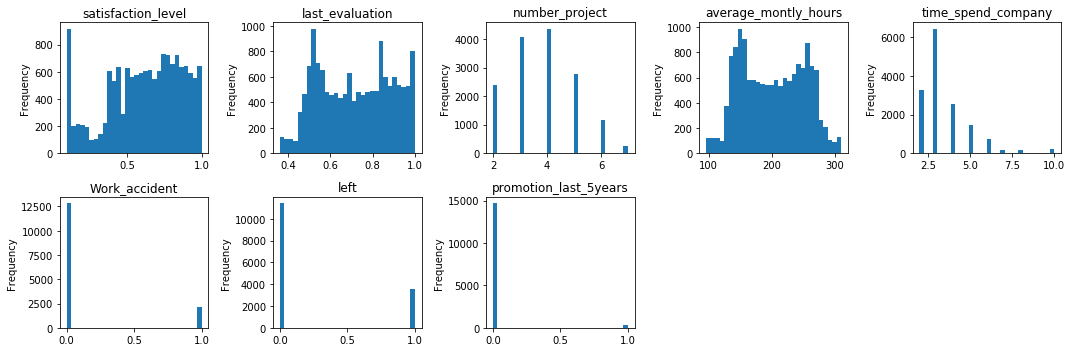

In [418]:
# 3. Check if any feature needs rescaling. You may plot a histogram of the feature to decide which rescaling method is more appropriate.

numeric_columns = df.columns[df.dtypes != 'object'].values
categorical_columns = [item for item in df.columns if item not in numeric_columns]

import math
import matplotlib.pyplot as plt
from matplotlib import gridspec

def do_plot(ax, feature_name):
    df[feature_name].plot(ax=ax,
        kind='hist',
        bins=30,
        title=feature_name)

N = len(numeric_columns)
cols = 5
rows = int(math.ceil(N / cols))

gs = gridspec.GridSpec(rows, cols)
fig = plt.figure(figsize=(15,5))
for n in range(N):
    ax = fig.add_subplot(gs[n])
    do_plot(ax, numeric_columns[n])

fig.tight_layout()

In [419]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer

# columns = np.concatenate((numeric_columns , categorical_columns))

# features = df[columns]

# ct = make_column_transformer(
#     (StandardScaler(), numeric_columns),
#     (OneHotEncoder(), categorical_columns))

# scaled_features = ct.fit_transform(features)
# print(scaled_features)

# df_scaled = pd.DataFrame(scaled_features, columns = columns)
# print(df_scaled)



# for col in range(len(numeric_columns)):
#     col_name = numeric_columns[col]
    
#     features = df[col_name]
#     features_values_reshaped = features.values.reshape(-1,1)

#     scaler = StandardScaler().fit(features_values_reshaped)
#     features_scaled = scaler.transform(features_values_reshaped)

#     df[f'{col_name}_scaled'] = features_scaled.reshape(df.shape[0], -1)

df['average_montly_hours'] = df['average_montly_hours'] / 100
df['time_spend_company'] = df['time_spend_company'] / 10

df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,1.57,0.3,0,1,0,sales,low
1,0.80,0.86,5,2.62,0.6,0,1,0,sales,medium
2,0.11,0.88,7,2.72,0.4,0,1,0,sales,medium
3,0.72,0.87,5,2.23,0.5,0,1,0,sales,low
4,0.37,0.52,2,1.59,0.3,0,1,0,sales,low


In [420]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,2.010503,0.349823,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,0.499431,0.146014,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,0.960000,0.200000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,1.560000,0.300000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,2.000000,0.300000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,2.450000,0.400000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,3.100000,1.000000,1.000000,1.000000,1.000000


In [421]:
# 4. convert the categorical features into binary dummy columns. You will then have to combine them with the numerical features using pd.concat.

dummies = pd.get_dummies(df[categorical_columns])
dummies.head()

,sales_IT,sales_RandD,sales_accounting,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical,salary_high,salary_low,salary_medium
0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,1,0,0,0,0,1
2,0,0,0,0,0,0,0,1,0,0,0,0,1
3,0,0,0,0,0,0,0,1,0,0,0,1,0
4,0,0,0,0,0,0,0,1,0,0,0,1,0


In [422]:
X = pd.concat([df.drop(['left', 'salary', 'sales'], axis=1), dummies], axis=1).values
y = df['left'].values
X.shape

(14999, 20)

In [423]:
# 5. do the usual train/test split with a 20% test size

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    test_size=0.2)

In [424]:
# 6. play around with learning rate and optimizer
model = Sequential()
model.add(Dense(1, input_dim=20, activation='sigmoid'))
model.compile(Adam(lr=0.5), 'binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_30"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_30 (Dense)             (None, 1)                 21        
Total params: 21
Trainable params: 21
Non-trainable params: 0
_________________________________________________________________


In [425]:
model.fit(X_train, y_train, epochs=10)

Epoch 1/10
11999/11999 [==============================] - 2s 175us/step - loss: 0.5386 - acc: 0.7591
Epoch 2/10
11999/11999 [==============================] - 1s 54us/step - loss: 0.5397 - acc: 0.7623
Epoch 3/10
11999/11999 [==============================] - 1s 55us/step - loss: 0.5024 - acc: 0.7687
Epoch 4/10
11999/11999 [==============================] - 1s 53us/step - loss: 0.5507 - acc: 0.7576
Epoch 5/10
11999/11999 [==============================] - 1s 54us/step - loss: 0.5371 - acc: 0.7628
Epoch 6/10
11999/11999 [==============================] - 1s 52us/step - loss: 0.5503 - acc: 0.7586
Epoch 7/10
11999/11999 [==============================] - 1s 54us/step - loss: 0.5357 - acc: 0.7604
Epoch 8/10
11999/11999 [==============================] - 1s 52us/step - loss: 0.5194 - acc: 0.7679
Epoch 9/10
11999/11999 [==============================] - 1s 53us/step - loss: 0.5363 - acc: 0.7626
Epoch 10/10
11999/11999 [==============================] - 1s 57us/step - loss: 0.5280 - acc: 0.759

In [426]:
# 7. check the confusion matrix, precision and recall

y_test_pred = model.predict_classes(X_test)

from sklearn.metrics import confusion_matrix, classification_report

def pretty_confusion_matrix(y_true, y_pred, labels=["False", "True"]):
    cm = confusion_matrix(y_true, y_pred)
    pred_labels = ['Predicted ' + l for l in labels]
    df = pd.DataFrame(cm, index=labels, columns=pred_labels)
    return df

pretty_confusion_matrix(y_test, y_test_pred, labels=['Stay', 'Leave'])

,Predicted Stay,Predicted Leave
Stay,1657,660
Leave,187,496


In [409]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      2295
           1       0.23      1.00      0.38       705

    accuracy                           0.23      3000
   macro avg       0.12      0.50      0.19      3000
weighted avg       0.06      0.23      0.09      3000



/Users/tobias/miniconda3/envs/ztdl/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [427]:
# 8. check if you still get the same results if you use a 5-Fold cross validation on all the data

from keras.wrappers.scikit_learn import KerasClassifier

def build_logistic_regression_model():
    model = Sequential()
    model.add(Dense(1, input_dim=20, activation='sigmoid'))
    model.compile(Adam(lr=0.5), 'binary_crossentropy', metrics=['accuracy'])
    return model

model = KerasClassifier(build_fn=build_logistic_regression_model,
                       epochs=10, verbose=0)

In [428]:
from sklearn.model_selection import KFold, cross_val_score

cv = KFold(5, shuffle=True)
scores = cross_val_score(model, X, y, cv=cv)

print("The cross validation accuracy is {:0.4f} ± {:0.4f}".format(scores.mean(), scores.std()))

The cross validation accuracy is 0.7756 ± 0.0169


In [429]:
scores

array([0.74333333, 0.79066667, 0.786     , 0.77466667, 0.78326109])

In [413]:
# 9. Is the model good enough for your boss?

# >> not better than benchmark